In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf



# Partie 1 : nettoyage + résumé des données


data = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_7/data_projet_7.csv",sep=',',decimal=b',')
df=pd.DataFrame(data)
print(df.head())

  country  year_survey  quantile  nb_quantiles      income  gdpppp
0     ALB         2008         1           100   728.89795  7297.0
1     ALB         2008         2           100   916.66235  7297.0
2     ALB         2008         3           100  1010.91600  7297.0
3     ALB         2008         4           100  1086.90780  7297.0
4     ALB         2008         5           100  1132.69970  7297.0


In [2]:
print(df[df.isna().any(axis=1)].country.unique())
#Le Kosovo et le territoire Palestinien n'ont pas de valeur pour le gdpppp, il faudra les retirer pour certaines analyses

['XKX' 'PSE']


In [3]:
df.drop(columns=["country","year_survey","quantile","nb_quantiles"]).duplicated().sum() #Il n'y a aucun doublon

0

In [4]:
df.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11599.000000,11599.000000,11599.0,11599.000000,1.139900e+04
mean,2007.982757,50.500819,100.0,6069.224260,5.022128e+04
std,0.909633,28.868424,0.0,9414.185972,4.000688e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.500000,100.0,900.685515,2.576000e+03
50%,2008.000000,51.000000,100.0,2403.244900,7.560000e+03
75%,2008.000000,75.500000,100.0,7515.420900,1.877300e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


[2008 2009 2010 2007 2006 2011 2004]
year_survey
2004     100
2006     500
2007    1500
2008    7599
2009    1200
2010     600
2011     100
Name: year_survey, dtype: int64


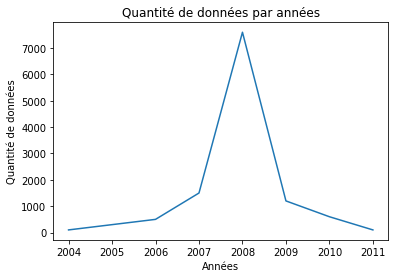

In [5]:
print(df.year_survey.unique())
print(df.year_survey.groupby(df.year_survey).count())

df.year_survey.unique(),df.year_survey.groupby(df.year_survey).count().plot()
plt.xlabel('Années')
plt.ylabel('Quantité de données')
plt.title('Quantité de données par années')
plt.show()

In [6]:
# On regarde si tous les pays ont bien le bon nombre de quantiles 

print(df[df.year_survey==2008].groupby("country").sum()[df[df.year_survey==2008].groupby("country").sum()["quantile"]<5050]) #LTU

         year_survey  quantile  nb_quantiles       income     gdpppp
country                                                             
LTU           198792      5009          9900  657483.5158  1739529.0


In [7]:
# Il manque le quantile 41 à la Lituanie
# Je décide alors d'y entrer la moyenne entre le quantile précédent et le suivant.

a=(4868.4507+4895.8306)/2

part1=df.iloc[:6240]
part2=df.iloc[6240:]

part2.index+=1
colonne={'country':"LTU",'year_survey':2008,'quantile':41,'nb_quantiles':100,'income':a,'gdpppp':17571.0}

liste=pd.DataFrame(index=[6140],data=colonne)

tout=part1.append(liste)

df=tout.append(part2)


print(df[df.country=='LTU'][df[df.country=='LTU']["quantile"]<50].tail(15))

print(df)

     country  year_survey  quantile  nb_quantiles      income   gdpppp
6234     LTU         2008        35           100  4503.23730  17571.0
6235     LTU         2008        36           100  4591.10640  17571.0
6236     LTU         2008        37           100  4701.13300  17571.0
6237     LTU         2008        38           100  4756.43360  17571.0
6238     LTU         2008        39           100  4802.36800  17571.0
6239     LTU         2008        40           100  4868.45070  17571.0
6140     LTU         2008        41           100  4882.14065  17571.0
6241     LTU         2008        42           100  4895.83060  17571.0
6242     LTU         2008        43           100  4950.63800  17571.0
6243     LTU         2008        44           100  5006.78600  17571.0
6244     LTU         2008        45           100  5028.54440  17571.0
6245     LTU         2008        46           100  5088.50900  17571.0
6246     LTU         2008        47           100  5165.55800  17571.0
6247  

In [8]:
print("Les données contiennent",int(pd.DataFrame(df.country.unique()).count()),"pays")

Les données contiennent 116 pays


In [9]:
#Je compte le nombre de pays représentés par année

print(pd.DataFrame(df[df.year_survey==2004].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2006].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2007].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2008].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2009].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2010].country.unique()).count())
print("\n",pd.DataFrame(df[df.year_survey==2011].country.unique()).count())
print("\n",1+5+15+76+12+6+1)

#Il semple que tous les pays ne sont représentés qu'une seule année

0    1
dtype: int64

 0    5
dtype: int64

 0    15
dtype: int64

 0    76
dtype: int64

 0    12
dtype: int64

 0    6
dtype: int64

 0    1
dtype: int64

 116


In [10]:
liste=[]
for i in df.country.unique():
    liste.append(i)
print(pd.DataFrame(liste).count())

liste2=[]
for i in df[df["quantile"]==1].country:
    liste2.append(i)
print(pd.DataFrame(liste2).count())  # Effectivement, aucun pays n'est représenté deux années différentes

0    116
dtype: int64
0    116
dtype: int64


In [11]:
#Recherche d'outlier pour l'income, la Bolivie, la Chine et la Corée du Sud sont suspects

print(df.sort_values(by='income',ascending=True).head(10))
print("\n",df.sort_values(by='income',ascending=True).tail(10))

      country  year_survey  quantile  nb_quantiles     income       gdpppp
1700      CHN         2007         1           100  16.719418   5712.00000
5700      KOR         2008         1           100  17.317732  19162.00000
1100      BOL         2008         1           100  20.584948   3950.00000
11500     COD         2008         1           100  29.364283    303.19305
6700      MDG         2010         1           100  29.411367    950.00000
1800      CIV         2008         1           100  34.555264   1526.00000
9800      SWZ         2009         1           100  35.930096   4748.00000
6000      LBR         2007         1           100  37.782673    372.00000
3900      GTM         2011         1           100  38.463615   4367.00000
1400      CAF         2008         1           100  40.928130    685.00000

       country  year_survey  quantile  nb_quantiles      income   gdpppp
2299      CYP         2008       100           100   98480.560  26273.0
2499      DEU         2008   

              income
quantile            
1          20.584948
2          57.159256
3          85.552185
4         112.422820
5         143.889390
6         177.537310
7         213.239530
8         251.587940
9         284.519800
10        321.951020
             income
quantile           
91         6273.578
92         6693.398
93         7179.325
94         7785.688
95         8379.340
96         9361.590
97        10673.366
98        13003.030
99        17933.918
100       43786.920


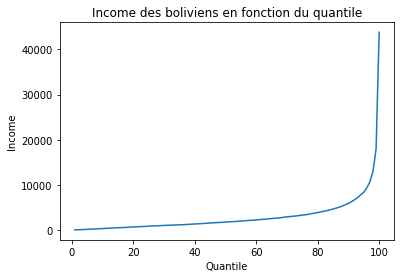

In [12]:
print(df[df.country=='BOL'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').head(10))
print(df[df.country=='BOL'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').tail(10))
plt.plot(df[df.country=='BOL'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile'))
plt.xlabel("Quantile")
plt.ylabel("Income")
plt.title("Income des boliviens en fonction du quantile")
plt.show()

              income
quantile            
1          16.719418
2         234.150730
3         282.894900
4         323.826500
5         362.260600
6         395.279660
7         425.010070
8         452.844970
9         480.534400
10        505.896820
              income
quantile            
91         5629.4590
92         5910.5156
93         6220.7820
94         6565.0327
95         6997.9136
96         7588.1950
97         8317.5530
98         9382.2840
99        11071.5100
100       17091.4040


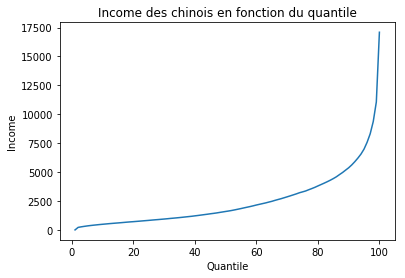

In [13]:
print(df[df.country=='CHN'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').head(10))
print(df[df.country=='CHN'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').tail(10))
plt.plot(df[df.country=='CHN'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile'))
plt.xlabel("Quantile")
plt.ylabel("Income")
plt.title("Income des chinois en fonction du quantile")
plt.show()

               income
quantile             
1           17.317732
2          679.077600
3         1763.440800
4         2609.038300
5         3166.106200
6         3620.534000
7         4023.435300
8         4369.286600
9         4655.849000
10        4972.012000

              income
quantile           
91        27867.617
92        29058.322
93        30448.105
94        31849.380
95        33631.062
96        35922.043
97        38527.285
98        42618.953
99        50083.310
100       76620.180


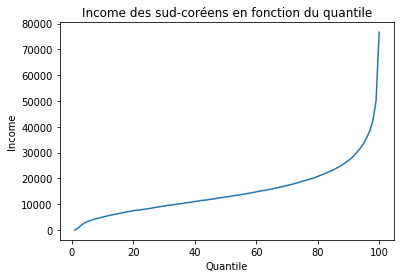

In [14]:
print(df[df.country=='KOR'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').head(10))
print("\n",df[df.country=='KOR'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile').tail(10))
plt.plot(df[df.country=='KOR'].drop(columns=["country","year_survey","nb_quantiles","gdpppp"]).set_index('quantile'))
plt.xlabel("Quantile")
plt.ylabel("Income")
plt.title("Income des sud-coréens en fonction du quantile")
plt.show()

In [15]:
#Recherche d'outliers pour le gdpppp

print(df[df['quantile']==1].sort_values(by='gdpppp',ascending=True).head(10))
print("\n",df[df['quantile']==1].sort_values(by='gdpppp',ascending=True).tail(10))

#Les îles Figji sont un outlier au niveau du gdpppp

      country  year_survey  quantile  nb_quantiles      income      gdpppp
11500     COD         2008         1           100   29.364283   303.19305
6000      LBR         2007         1           100   37.782673   372.00000
7700      NER         2007         1           100  137.395310   631.00000
1400      CAF         2008         1           100   40.928130   685.00000
7500      MWI         2010         1           100  115.632480   728.81158
7300      MOZ         2008         1           100   42.583840   773.00000
7000      MLI         2010         1           100  122.693474   929.52966
6700      MDG         2010         1           100   29.411367   950.00000
3700      GIN         2007         1           100   93.354190   977.00000
8200      NPL         2010         1           100  192.238780  1048.18080

       country  year_survey  quantile  nb_quantiles      income     gdpppp
300       AUT         2008         1           100  2958.07640    36193.0
4800      ISL         200

In [16]:
#Valeur trouvée sur internet pour les fidji : 7066.72

df.loc[3200:3299,"gdpppp"]=7066.72

In [17]:
a=0
b=0
for i in df.country.unique() :
    if not df[df.country==i].income.is_monotonic_increasing :
        print(i)
#Les quantiles sont bien croissants

In [18]:
#Import et merge d'une table contenant les noms des pays ainsi que les régions

data2 = pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_7/Indice_gini/Country.csv")
df_country=pd.DataFrame(data2)
df_country=df_country.rename(index=str, columns={'Country Code':'country'})
df=pd.merge(df,df_country,how='left')
df=df.drop(columns=['IncomeGroup', 'SpecialNotes','Unnamed: 5'])

# Recherche de NaN

df.TableName=df.TableName.dropna(axis=0)
print(df.loc[10401]) # country TWN mais TableName et Region NaN
df.loc[10400:10499,"TableName"]="Taiwan"
df.loc[10400:10499,"Region"]='South Asia'
print(df_country)

country             TWN
year_survey        2008
quantile              2
nb_quantiles        100
income          4740.26
gdpppp            25342
Region              NaN
TableName           NaN
Name: 10401, dtype: object
    country                      Region          IncomeGroup  \
0       ABW   Latin America & Caribbean          High income   
1       AFG                  South Asia           Low income   
2       AGO          Sub-Saharan Africa  Lower middle income   
3       ALB       Europe & Central Asia  Upper middle income   
4       AND       Europe & Central Asia          High income   
5       ARB                         NaN                  NaN   
6       ARE  Middle East & North Africa          High income   
7       ARG   Latin America & Caribbean          High income   
8       ARM       Europe & Central Asia  Upper middle income   
9       ASM         East Asia & Pacific  Upper middle income   
10      ATG   Latin America & Caribbean          High income   
11      AUS  

In [19]:
# Import et merge d'une table contenant la population de chaque pays

pop=pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_7/Pop/pop1.csv",skiprows=3)
df_pop=pd.DataFrame({'country':pop["Country Code"],'Population 2017':pop["2017"]})
df=pd.merge(df,df_pop,how="left")    
df.loc[10400:10499,"Population 2017"]=23415126

#La population mondiale est estimée à 7,55 milliards au 1er juillet 2017 selon l'ONU

print("L'analyse couvre ", round(df.groupby(df.country)["Population 2017"].mean().sum()/7550000000*100,2), "% de la population")

L'analyse couvre  90.79 % de la population


In [20]:
#Import d'une table contenant l'indice de gini

df_gini=pd.read_csv("C:/Users/KyRun69/Desktop/API_SI.POV.GINI_DS2_en_csv_v2_10134274/API_SI.POV.GINI_DS2_en_csv_v2_10134274.csv", skiprows=3)
df_gini=df_gini.drop(columns='Unnamed: 62')
#print(gini.fillna(gini.drop(columns=['Indicator Code','Indicator Name','Country Code','Country Name']).mean()))
df_gini=df_gini.dropna(axis=1,how="all")
print(df_gini) #19 colonnes ne contenaient que des nan


                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                                          Afghanistan          AFG   
2                                               Angola          AGO   
3                                              Albania          ALB   
4                                              Andorra          AND   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                       American Samoa          ASM   
10                                 Antigua and Barbuda          ATG   
11                                           Australia          AUS   
12                                             Austria          AUT   
13    

In [21]:
#Les données de la world income distribution présentent pour chaque pays les centiles de la distribution des revenus de leur population respective.

#La division des revenus en quantiles est une bonne chose. En effet, étudier des millions de revenus différents n'est pas chose aisée, il faut les regrouper.
#Cependant lors de la division des revenus, il y a perte d'information. En effet l'income est calculé en fonction du revenu moyen des individus de la classe de revenu.
#Nous n'avons alors pas d'information sur la contribution de chaque individus à cette moyenne. 
#La totalité des revenus des individus est-elle égale à cette moyenne ? Ou bien peut-être qu'aucun individu a des revenus égal à cette moyenne.
#C'est pour cela que la division en 100 quantiles (centile) est une bonne chose, nous perdons moins d'informations étant donné du grand nombre de groupe.

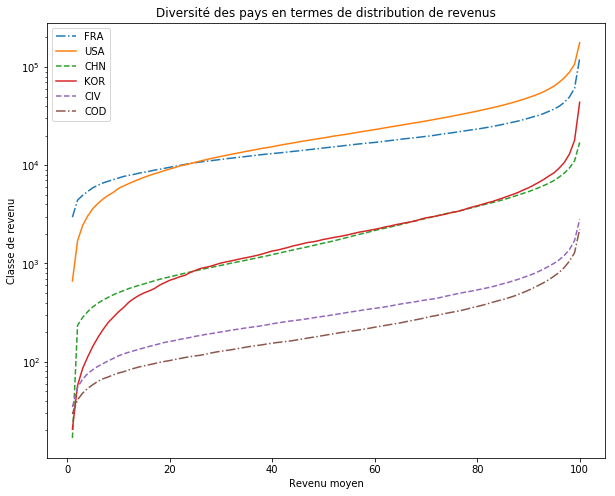

In [22]:
fig = plt.figure(figsize=[10,8])
plt.plot(df[df.country=="FRA"]["quantile"],df[df.country=="FRA"].income,label='FRA',linestyle='-.')
plt.plot(df[df.country=="USA"]["quantile"],df[df.country=="USA"].income,label='USA')
plt.plot(df[df.country=="CHN"]["quantile"],df[df.country=="CHN"].income,label='CHN',linestyle='--')
plt.plot(df[df.country=="BOL"]["quantile"],df[df.country=="BOL"].income,label='KOR')
plt.plot(df[df.country=="CIV"]["quantile"],df[df.country=="CIV"].income,label='CIV',linestyle='--')
plt.plot(df[df.country=="COD"]["quantile"],df[df.country=="COD"].income,label='COD',linestyle='-.')
plt.yscale('log')
plt.xlabel("Revenu moyen")
plt.ylabel("Classe de revenu")
plt.legend()
plt.title("Diversité des pays en termes de distribution de revenus")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


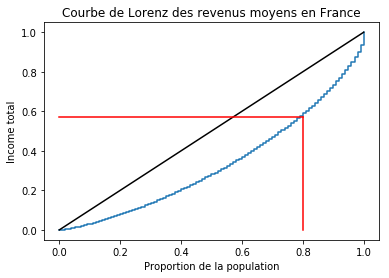

0.34563984035678896


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


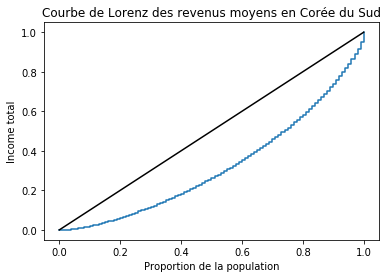

0.3679348075765505


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


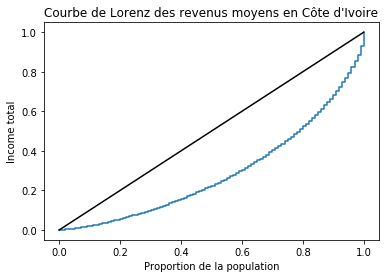

0.4306264576999087


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


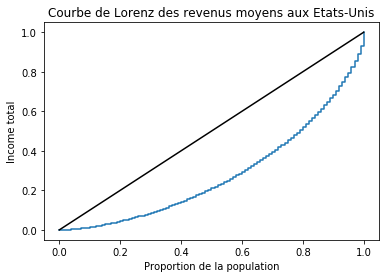

0.4473259041392894


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


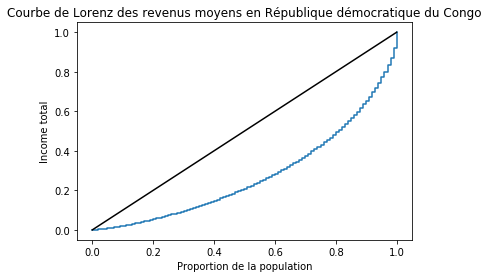

0.4594028681887181


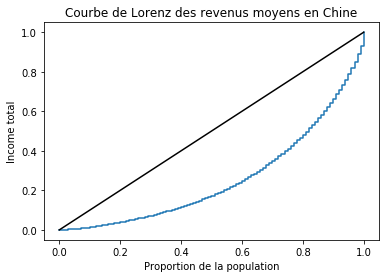

0.4933322469825082


In [23]:
lorenz = np.cumsum(df[df.year_survey==2008][df.country=="FRA"].income / df[df.year_survey==2008][df.country=="FRA"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.plot([0.8,0.0],[0.57,0.57],"r")
plt.plot([0.8,0.8],[0.57,0.0],"r")
plt.title('Courbe de Lorenz des revenus moyens en France')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)

lorenz = np.cumsum(df[df.year_survey==2008][df.country=="KOR"].income / df[df.year_survey==2008][df.country=="KOR"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens en Corée du Sud')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)


lorenz = np.cumsum(df[df.year_survey==2008][df.country=="CIV"].income / df[df.year_survey==2008][df.country=="CIV"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens en Côte d\'Ivoire')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)


lorenz = np.cumsum(df[df.year_survey==2008][df.country=="USA"].income / df[df.year_survey==2008][df.country=="USA"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens aux Etats-Unis')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)


lorenz = np.cumsum(df[df.year_survey==2008][df.country=="COD"].income / df[df.year_survey==2008][df.country=="COD"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens en République démocratique du Congo')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)


lorenz = np.cumsum(df[df.country=="CHN"].income / df[df.country=="CHN"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens en Chine')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)

In [24]:
# Création d'une petit DataFrame pour analyser l'évolution des indices de Gini dans les pays précédents

df_tempo=pd.merge(((df_gini[df_gini["Country Code"]=='USA'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),((df_gini[df_gini["Country Code"]=='FRA'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),how="outer")
df_tempo=pd.merge(df_tempo,((df_gini[df_gini["Country Code"]=='CHN'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),how="outer")
df_tempo=pd.merge(df_tempo,((df_gini[df_gini["Country Code"]=='KOR'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),how="outer")
df_tempo=pd.merge(df_tempo,((df_gini[df_gini["Country Code"]=='CIV'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),how="outer")
df_tempo=pd.merge(df_tempo,((df_gini[df_gini["Country Code"]=='COD'].dropna(axis=1,how="all")).drop(columns=['Country Name','Indicator Name','Indicator Code'])),how="outer")

df_tempo=df_tempo.reindex(sorted(df_tempo.columns), axis=1)
df_tempo=df_tempo.set_index("Country Code",drop=True).transpose()

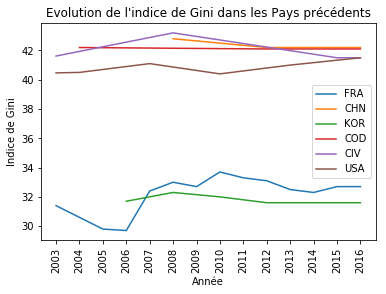

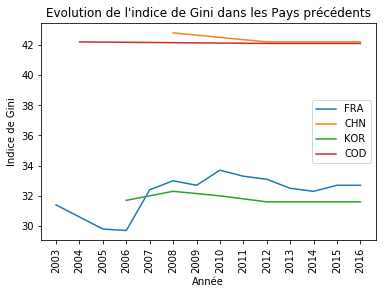

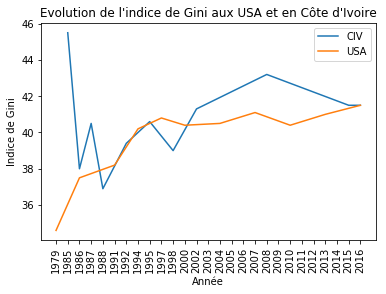

In [25]:
df_tempo=df_tempo.interpolate()


plt.plot(df_tempo.loc['2003':].FRA,label="FRA")
plt.plot(df_tempo.loc['2003':].CHN,label="CHN")
plt.plot(df_tempo.loc['2003':].KOR,label="KOR")
plt.plot(df_tempo.loc['2003':].COD,label="COD")
plt.plot(df_tempo.loc['2003':].CIV,label="CIV")
plt.plot(df_tempo.loc['2003':].USA,label="USA")
plt.legend()
plt.xticks(rotation=90)
plt.title("Evolution de l'indice de Gini dans les Pays précédents")
plt.xlabel("Année")
plt.ylabel("Indice de Gini")
plt.show()


plt.plot(df_tempo.FRA,label="FRA")
plt.plot(df_tempo.CHN,label="CHN")
plt.plot(df_tempo.KOR,label="KOR")
plt.plot(df_tempo.COD,label="COD")

plt.legend()
plt.xticks(rotation=90)
plt.title("Evolution de l'indice de Gini dans les Pays précédents")
plt.xlabel("Année")
plt.ylabel("Indice de Gini")
plt.show()

plt.plot(df_tempo.CIV,label="CIV")
plt.plot(df_tempo.USA,label="USA")
plt.legend()
plt.xticks(rotation=90)
plt.title("Evolution de l'indice de Gini aux USA et en Côte d'Ivoire")
plt.xlabel("Année")
plt.ylabel("Indice de Gini")
plt.show()

In [26]:
#Création d'une colonne nommée recent contenant les indices de gini les plus recents pour tous les pays

df_gini=df_gini.drop(columns=["Country Code","Indicator Name", "Indicator Code"]).set_index("Country Name").dropna(how="all")
df_gini=df_gini.reset_index(drop=False)
df_gini_test=df_gini.reset_index(drop=True).drop(columns="Country Name")
print(float(df_gini_test.loc[0].dropna().tail(1)))
i=0
liste=[]
for i in df_gini_test.index :
    if i == 161 :
        break
    else :
        liste.append(float(df_gini_test.loc[i].dropna().tail(1)))
df_gini_test=df_gini_test.add(pd.DataFrame(liste),fill_value=0)
df_gini=pd.merge(df_gini,df_gini_test,how="left")
df_gini=df_gini.rename(columns={0:"recent"}).set_index("Country Name")
print(df_gini)


42.7
                          1979  1980  1981  1982  1983  1984  1985  1986  \
Country Name                                                               
Angola                     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Albania                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Argentina                  NaN  40.8   NaN   NaN   NaN   NaN   NaN  42.8   
Armenia                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Australia                  NaN   NaN  31.3   NaN   NaN   NaN  32.5   NaN   
Austria                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Azerbaijan                 NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Burundi                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Belgium                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Benin                      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Burkina Faso               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Banglad

In [27]:
#Recherche d'outliers dans les indices de gini

print("La moyenne des indices de Gini est de :",df_gini["recent"].mean())
print("\n",df_gini.sort_values(by="recent",ascending=False)["recent"].head(5))
print("\n",df_gini.sort_values(by="recent",ascending=True)["recent"].head(5))
print("\n La France est en position",df_gini.sort_values(by="recent",ascending=True)["recent"].index.get_loc("France"),"en allant de l'indice le moins élevé au plus élevé")

#L'Azerbaijan semble être un outlier

La moyenne des indices de Gini est de : 38.4385093167702

 Country Name
South Africa    63.0
Botswana        60.5
Namibia         59.1
Suriname        57.6
Zambia          57.1
Name: recent, dtype: float64

 Country Name
Azerbaijan        16.6
Ukraine           25.0
Slovenia          25.4
Czech Republic    25.9
Moldova           26.3
Name: recent, dtype: float64

 La France est en position 39 en allant de l'indice le moins élevé au plus élevé


1995      34.7
2001      36.5
2002      17.4
2003      18.8
2004      16.2
2005      16.6
recent    16.6
Name: Azerbaijan, dtype: float64


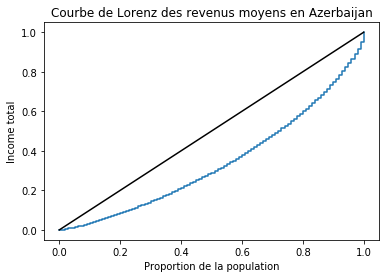

0.3290308735275258


In [28]:
print(df_gini.loc["Azerbaijan"].dropna())

lorenz = np.cumsum(df[df.country=="AZE"].income / df[df.country=="AZE"].income.sum())
lorenz = np.append([0],lorenz) 

plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot([0,1],"k")
plt.title('Courbe de Lorenz des revenus moyens en Azerbaijan')
plt.xlabel("Proportion de la population")
plt.ylabel("Income total")
plt.show()

aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
print(gini)

df_gini.loc["Azerbaijan"][39]=32.9

In [29]:
print("\n",df_gini.sort_values(by="recent",ascending=False)["recent"].head(5))
print("\n",df_gini.sort_values(by="recent",ascending=True)["recent"].head(5))


 Country Name
South Africa    63.0
Botswana        60.5
Namibia         59.1
Suriname        57.6
Zambia          57.1
Name: recent, dtype: float64

 Country Name
Ukraine            25.0
Slovenia           25.4
Czech Republic     25.9
Moldova            26.3
Slovak Republic    26.5
Name: recent, dtype: float64


In [30]:
print("l\'indice gini de la France est de : {}".format(df_gini.loc["France"][39]))
print("l\'indice gini de la Corée du Sud est de : {}".format(df_gini.loc["Korea, Rep."][39]))
print("l\'indice gini de la Cote d'Ivoire est de : {}".format(df_gini.loc["Cote d'Ivoire"][39]))
print("l\'indice gini des USA est de : {}".format(df_gini.loc["United States"][39]))
print("l\'indice gini de la République Démocratique du Congo est de : {}".format(df_gini.loc["Congo, Dem. Rep."][39]))
print("l\'indice gini de la Chine est de : {}".format(df_gini.loc["China"][39]))

l'indice gini de la France est de : 32.7
l'indice gini de la Corée du Sud est de : 31.6
l'indice gini de la Cote d'Ivoire est de : 41.5
l'indice gini des USA est de : 41.5
l'indice gini de la République Démocratique du Congo est de : 42.1
l'indice gini de la Chine est de : 42.2


In [31]:
#Import d'un DataFrame contenant le coefficient d'elasticité de chaque pays

df_elastici=pd.read_csv("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_7/GDIMMay2018.csv")
IGE=df_elastici[['region','IGEincome']]
print(IGE)

                     region  IGEincome
0                South Asia        NaN
1                South Asia        NaN
2                South Asia        NaN
3                South Asia        NaN
4                South Asia        NaN
5                South Asia        NaN
6                South Asia        NaN
7                South Asia        NaN
8                South Asia        NaN
9                South Asia        NaN
10               South Asia        NaN
11               South Asia        NaN
12       Sub-Saharan Africa        NaN
13       Sub-Saharan Africa        NaN
14       Sub-Saharan Africa        NaN
15       Sub-Saharan Africa        NaN
16       Sub-Saharan Africa        NaN
17       Sub-Saharan Africa        NaN
18       Sub-Saharan Africa        NaN
19       Sub-Saharan Africa        NaN
20       Sub-Saharan Africa        NaN
21       Sub-Saharan Africa        NaN
22       Sub-Saharan Africa        NaN
23       Sub-Saharan Africa        NaN
24    Europe & Central As

In [32]:
#Import d'un txt contenant des informations nous permettant de combler les coefficients d'elasticité manquants 

df_elastici3=pd.read_table("C:/Users/KyRun69/Desktop/Cours_Openclassrooms/Projets/Projet_7/elasticity.txt")
print(df_elastici3)
print(df.Region.unique())

   Coefficients of intergenerational elasticity between parents’ and
0                                   children’s income               
1                             | Base case  | Optim...               
2                             |            | (high...               
3   ----------------------------------------------...               
4   Nordic European countries |    0.2     |      ...               
5   and Canada                |            |      ...               
6   ----------------------------------------------...               
7   Europe (except nordic     |    0.4     |      ...               
8   countries)                |            |      ...               
9   ----------------------------------------------...               
10  Australia/New Zealand/USA |    0.4     |      ...               
11  ----------------------------------------------...               
12  Asia                      |    0.5     |      ...               
13  ------------------------------

In [33]:
#On comble les valeurs manquantes

data3={"region":['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
 'Latin America & Caribbean', 'East Asia & Pacific','Middle East & North Africa'],
 "elasticity":[0.5,0.66,0.4,0.66,0.4,0.66]}
region=pd.DataFrame(data=data3)
df_elastici=pd.merge(df_elastici,region,how="left")

df_elastici.IGEincome=df_elastici.IGEincome.fillna(df_elastici.elasticity)

#Pas de valeur pour les pays ['Estonia','Hungary','Iceland','Israel','Lithuania','Poland','Uruguay']

df_elastici=df_elastici[['countryname','region','IGEincome']].groupby(['countryname','region']).mean()
df_elastici=df_elastici.reset_index()
df_elastici.loc[42,"IGEincome"]=0.2
df_elastici.loc[56,"IGEincome"]=0.4
df_elastici.loc[57,"IGEincome"]=0.2
df_elastici.loc[63,"IGEincome"]=0.66
df_elastici.loc[78,"IGEincome"]=0.2
df_elastici.loc[108,"IGEincome"]=0.4
df_elastici.loc[142,"IGEincome"]=0.66

#print(df_elastici[df_elastici.isnull().any(axis=1)]) 

#Il n'y a pas de Na

In [34]:
#print(df_elastici.countryname)
#print(df.head(10))
#print(df_gini.reset_index()[["Country Name","2018"]].rename(columns={"Country Name":"TableName"}))
print(df[df.isnull().any(axis=1)].TableName.unique())
#print(df[df.TableName=="Taiwan"])
df=pd.merge(df,df_gini.reset_index()[["Country Name","recent"]].rename(columns={"Country Name":"TableName","recent":"gini"}),how="left")
#print(df)
print(df[df.isnull().any(axis=1)].TableName.unique())
print(df[df.TableName=="Côte d'Ivoire"].head())

['Kosovo' 'West Bank and Gaza']
["Côte d'Ivoire" 'Cambodia' 'Kosovo' 'Philippines' 'Poland' 'Serbia'
 'Taiwan' 'West Bank and Gaza']
     country  year_survey  quantile  nb_quantiles     income  gdpppp  \
1800     CIV         2008         1           100  34.555264  1526.0   
1801     CIV         2008         2           100  54.766040  1526.0   
1802     CIV         2008         3           100  66.659250  1526.0   
1803     CIV         2008         4           100  75.798510  1526.0   
1804     CIV         2008         5           100  83.163830  1526.0   

                  Region      TableName  Population 2017  gini  
1800  Sub-Saharan Africa  Côte d'Ivoire       24294750.0   NaN  
1801  Sub-Saharan Africa  Côte d'Ivoire       24294750.0   NaN  
1802  Sub-Saharan Africa  Côte d'Ivoire       24294750.0   NaN  
1803  Sub-Saharan Africa  Côte d'Ivoire       24294750.0   NaN  
1804  Sub-Saharan Africa  Côte d'Ivoire       24294750.0   NaN  


In [35]:
#On comble les valeurs manquantes

lorenz = np.cumsum(df[df.country=="CIV"].income / df[df.country=="CIV"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
df.loc[1800:1899,"gini"]=gini

lorenz = np.cumsum(df[df.country=="KHM"].income / df[df.country=="KHM"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
df.loc[5600:5699,"gini"]=gini

lorenz = np.cumsum(df[df.country=="PHL"].income / df[df.country=="PHL"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
df.loc[8600:8699,"gini"]=gini

lorenz = np.cumsum(df[df.country=="POL"].income / df[df.country=="POL"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S

df.loc[8700:8799,"gini"]=gini

lorenz = np.cumsum(df[df.country=="SRB"].income / df[df.country=="SRB"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S

df.loc[9400:9499,"gini"]=gini

lorenz = np.cumsum(df[df.country=="TWN"].income / df[df.country=="TWN"].income.sum())
lorenz = np.append([0],lorenz)
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 
S = 0.5 - aire_ss_courbe
gini = 2*S
df.loc[10400:10499,"gini"]=gini

print(df[df.isnull().any(axis=1)].TableName.unique())

['Kosovo' 'West Bank and Gaza']


In [36]:
def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]

In [37]:
pj = 0.9                 # coefficient d'élasticité du pays j
nb_quantiles = 100       # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
print(cd)

c_i_child = 5 
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))
print(sample)
pj=0
nb_quantiles=0
n=0
sample=0
y_child=0
y_parents=0
c_i_child=0
c_i_parent=0
#Je ne garde que la distribution conditionnelle ( cd)


[[0.241 0.136 0.081 ... 0.    0.    0.   ]
 [0.122 0.094 0.06  ... 0.    0.    0.   ]
 [0.093 0.064 0.069 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.058 0.066 0.075]
 [0.    0.    0.    ... 0.07  0.095 0.115]
 [0.    0.    0.    ... 0.095 0.104 0.246]]

P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.038
         y_child  y_parents  c_i_child  c_i_parent
0       0.199973   0.526071         12          27
1       3.395618   1.043958         82          52
2       1.325180   1.985594         59          76
3       0.891727   0.420972         47          20
4       0.053924   0.127956          2           2
5       0.314954   1.858167         20          74
6       0.189419   0.280272         11          11
7       1.199868   0.534000         56          27
8       0.966414   2.800760         49          85
9       4.566983   1.174355         87          57
10      3.669155   0.553762         84          28
11      0.914956   1.263501         48          60
12      2.446989   0

In [38]:
df=pd.merge(df,df_elastici.rename(columns={"countryname":"TableName"}).drop(columns="region"),how="left")

In [39]:
#On comble les valeurs manquantes

df.loc[1800:1899,"IGEincome"]=0.66
df.loc[9800:9899,"IGEincome"]=0.66
df.loc[9900:9999,"IGEincome"]=0.66
df.loc[10400:10499,"IGEincome"]=0.5

print(df[df.isnull().any(axis=1)].country.unique())


['XKX' 'PSE']


In [40]:
# Création de df2 1000 fois plus grand que df

df2=pd.concat([df]*1000, ignore_index=True)
df2=df2.sort_values(by=['country', 'quantile'], ascending=True)
df2=df2.reset_index(drop=True)

print(df2)

         country  year_survey  quantile  nb_quantiles       income  gdpppp  \
0            ALB         2008         1           100    728.89795  7297.0   
1            ALB         2008         1           100    728.89795  7297.0   
2            ALB         2008         1           100    728.89795  7297.0   
3            ALB         2008         1           100    728.89795  7297.0   
4            ALB         2008         1           100    728.89795  7297.0   
5            ALB         2008         1           100    728.89795  7297.0   
6            ALB         2008         1           100    728.89795  7297.0   
7            ALB         2008         1           100    728.89795  7297.0   
8            ALB         2008         1           100    728.89795  7297.0   
9            ALB         2008         1           100    728.89795  7297.0   
10           ALB         2008         1           100    728.89795  7297.0   
11           ALB         2008         1           100    728.897

In [41]:
# Création de deux listes. La seconde, liste4, contient le numéro du quantile. La première, liste3, contient le nombre de fois
# où il faut insérer le quantile correspondant. Par exemple à mon loc[0] les deux valeurs sont 1 et 238.
# Par la suite il faudra donc insérer 238 fois les quantile 1

liste3=[]
liste4=[]
i=0
j=0
k=0
l=0
#for k in range(100) :
#    print(k)


for i in df.country.unique() :
    for j in range(1,101,1) :
        for k in range(0,100,1) :
            liste4.append(k+1)
            p=proba_cond(k,(j-1),cd)
            liste3.append(int(1000*p))

print(pd.DataFrame(liste3))
print(pd.DataFrame(liste4))
            
        

           0
0        241
1        136
2         81
3         59
4         52
5         39
6         43
7         37
8         26
9         23
10        20
11        23
12        16
13        19
14        16
15         4
16        19
17         9
18        11
19         8
20         8
21         6
22        13
23        17
24         2
25         9
26         0
27         3
28         2
29         5
...      ...
1159970    4
1159971    5
1159972    6
1159973    5
1159974    8
1159975    5
1159976    5
1159977    7
1159978   11
1159979    6
1159980    6
1159981   11
1159982   12
1159983   15
1159984   19
1159985   13
1159986   14
1159987   20
1159988   24
1159989   24
1159990   16
1159991   26
1159992   36
1159993   43
1159994   44
1159995   53
1159996   66
1159997   95
1159998  104
1159999  246

[1160000 rows x 1 columns]
           0
0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        

In [42]:
# Création de liste5 comme décrite précédement 

enfants=pd.DataFrame({"nombre":liste3,"classe":liste4})
liste5=[]
i=0
j=0
for i in enfants.index :
    for j in range(0,enfants.loc[i,'nombre'],1) :
        liste5.append(enfants.loc[i,'classe'])
print(pd.DataFrame(liste5))    #pas super niveau temps d'execution. Optimisable

            0
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
...       ...
11599970  100
11599971  100
11599972  100
11599973  100
11599974  100
11599975  100
11599976  100
11599977  100
11599978  100
11599979  100
11599980  100
11599981  100
11599982  100
11599983  100
11599984  100
11599985  100
11599986  100
11599987  100
11599988  100
11599989  100
11599990  100
11599991  100
11599992  100
11599993  100
11599994  100
11599995  100
11599996  100
11599997  100
11599998  100
11599999  100

[11600000 rows x 1 columns]


In [43]:
df2["quantile_parents"]=pd.DataFrame(liste5)

In [44]:
#Création de df_sans qui exclue les pays où il manque des valeurs

df_sans = df2[df2.country!="XKX"]
df_sans = df_sans[df_sans.country!="PSE"]
df_sans=pd.merge(df_sans,df_sans.groupby("country")["income"].mean().reset_index(drop=False).rename(columns={"income":"mean_income"}),how="left")
df2=pd.merge(df2,df2.groupby("country")["income"].mean().reset_index(drop=False).rename(columns={"income":"mean_income"}),how="left")
df2["mean_income_log"] = np.log(df2["mean_income"])
df2["income_log"]=np.log(df2["income"])

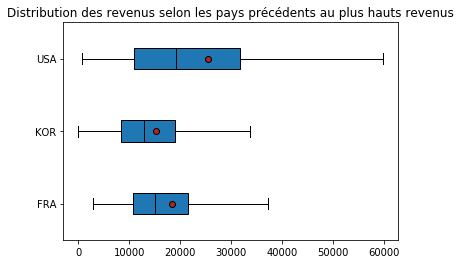

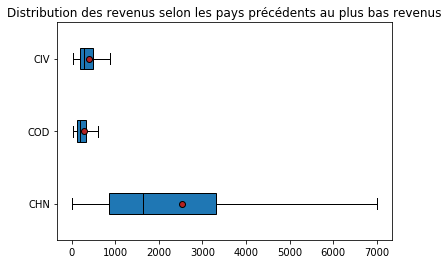

In [45]:
# ANOVA

X = 'country'
Y = 'income'

df_FRA=df2[df2.country=="FRA"]
df_CHN=df2[df2.country=="CHN"]
df_KOR=df2[df2.country=="KOR"]
df_COD=df2[df2.country=="COD"]
df_CIV=df2[df2.country=="CIV"]
df_USA=df2[df2.country=="USA"]

df_6=pd.concat([df_FRA,df_KOR,df_USA],ignore_index=True)
df_7=pd.concat([df_CHN,df_COD,df_CIV],ignore_index=True)


modalites = df_6[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_6[df_6[X]==m][Y])
    
       
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Distribution des revenus selon les pays précédents au plus hauts revenus')
plt.show()


modalites = df_7[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_7[df_7[X]==m][Y])
    
       
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title('Distribution des revenus selon les pays précédents au plus bas revenus')
plt.show()

In [46]:
df_50=df2.loc[0:4999999]

In [47]:
def calc_anova(x,y,data):
    
    k = len(pd.unique(data[x]))  # nombre de groupes
    N = len(data.values)  # taille de l'échantillon
    n = data.groupby(x).size() # nb de valeurs par groupes
    
    # DF = Degré de liberté
    
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1

    moyenne_y = data[y].mean()

    classes = []

    for classe in data[x].unique():

        yi_classe = data[y][data[x]==classe]

        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean(),
                       'variance_classe': yi_classe.var(ddof=0)})

    SCT = sum([(yj-moyenne_y)**2 for yj in data[y]])

    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    SCR = sum([c['ni']*(c['variance_classe']) for c in classes])
    
    
   
    
    
    MSbetween = SCE/DFbetween
    MSwithin = SCR/DFwithin
    F_value = MSbetween/MSwithin
    p_value = st.f.sf(F_value, DFbetween, DFwithin)
    
    resultat = dict({'SCE':round(SCE,3),'SCT':round(SCT,3),'SCR':round(SCR,3),'eta_squared':round(SCE/SCT,3),'Valeur_F':F_value,'P-valeur':p_value})


    return resultat

In [48]:
#calc_anova(X,Y,df_50)

In [49]:
#calc_anova(X,Y,df2)

In [50]:
#lm = smf.ols('income ~ C(country)',data=df_50).fit()
#aov_oneway_table = sm.stats.anova_lm(lm, typ=1) 

#aov_oneway_table

In [51]:
# Regression linéaire 1

X = df2[['mean_income','gini']]
Y = df2['income']
X = sm.add_constant(X)

In [52]:
results=sm.OLS(Y,X).fit()
results.params

const         -1.138187e-08
mean_income    1.000000e+00
gini          -1.342215e-10
dtype: float64

In [53]:
# Affichage des graphiques

#model = smf.ols(formula='income ~ mean_income + gini', data=df2)
#results_formula = model.fit()
#x_surf, y_surf = np.meshgrid(np.linspace(df2.mean_income.min(), df2.mean_income.max(), 100),np.linspace(df2.gini.min(), df2.gini.max(), 100))
#onlyX = pd.DataFrame({'mean_income': x_surf.ravel(), 'gini': y_surf.ravel()})
#fittedY=results_formula.predict(exog=onlyX)

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')

#exog = pd.DataFrame({'mean_income': x_surf.ravel(), 'gini': y_surf.ravel()})

#exog = sm.add_constant(exog)

#out = results_formula.predict(exog)
#ax.plot_surface(x_surf, y_surf,
#                out.values.reshape(x_surf.shape),
#                rstride=1,
#                cstride=1,
#                color='red',
#                alpha = 0.4)

#ax.scatter(df2['mean_income'],df2['gini'], Y,
#           c='blue',
#           marker='o',
#           alpha=1)

#ax.set_xlabel('salaire_moyen_pays_2008')
#ax.set_ylabel('indice_gini')
#ax.set_zlabel('income')

#ax.set_title('Nuage de points 3D et surface de régression linéaire')

#plt.show()

In [54]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)

# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model = round(results.rsquared,2)

Mean squared error: 44625745.01
Variance score: 0.50


In [55]:
# Regression linéaire 2

X = df2[['mean_income_log','gini']]
Y = df2['income_log']
X= sm.add_constant(X)

In [56]:
results=sm.OLS(Y,X).fit()
results.params

const             -0.041566
mean_income_log    1.009136
gini              -0.008546
dtype: float64

In [57]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)

# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model_2 = round(results.rsquared,2) 

Mean squared error: 0.53
Variance score: 0.72


In [58]:
model = smf.ols(formula='income_log ~ mean_income_log + gini', data=df2)
results_formula = model.fit()
x_surf, y_surf = np.meshgrid(np.linspace(df2.mean_income_log.min(), df2.mean_income_log.max(), 100),np.linspace(df2.gini.min(), df2.gini.max(), 100))
onlyX = pd.DataFrame({'mean_income_log': x_surf.ravel(), 'gini': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [59]:
# Affichage des graphiques

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')



#exog = pd.DataFrame({'mean_income_log': x_surf.ravel(), 'gini': y_surf.ravel()})

#exog = sm.add_constant(exog)

#out = results_formula.predict(exog)
#ax.plot_surface(x_surf, y_surf,
#                out.values.reshape(x_surf.shape),
#                rstride=1,
#                cstride=1,
#                color='red',
#                alpha = 0.4)

#ax.scatter(df2['mean_income_log'],df2['gini'], Y,
#           c='blue',
#           marker='o',
#           alpha=1)

#ax.set_xlabel('salaire_moyen_pays_2008')
#ax.set_ylabel('indice_gini')
#ax.set_zlabel('income')

#ax.set_title('Nuage de points 3D et surface de régression linéaire')

#plt.show()

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)

# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model_2 = round(results.rsquared,2) 

Mean squared error: 0.53
Variance score: 0.72


In [61]:
# Regression linéaire 2 v2
df_sans["gdpppp_log"] = np.log(df_sans["gdpppp"])
df_sans["income_log"]=np.log(df_sans["income"])

X = df_sans[['gdpppp_log','gini']]
Y = df_sans['income_log']
X= sm.add_constant(X)

In [62]:
results=sm.OLS(Y,X).fit()
results.params

const         0.327250
gdpppp_log    0.885492
gini         -0.007733
dtype: float64

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)

# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model_2 = round(results.rsquared,2) 

Mean squared error: 0.67
Variance score: 0.65


In [64]:
#model = smf.ols(formula='income_log ~ gdpppp_log + gini', data=df_sans)
#results_formula = model.fit()
#x_surf, y_surf = np.meshgrid(np.linspace(df_sans.gdpppp_log.min(), df_sans.gdpppp_log.max(), 100),np.linspace(df_sans.gini.min(), df_sans.gini.max(), 100))
#onlyX = pd.DataFrame({'gdpppp_log': x_surf.ravel(), 'gini': y_surf.ravel()})
#fittedY=results_formula.predict(exog=onlyX)

In [65]:
# Affichage des graphiques

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')



#exog = pd.DataFrame({'gdpppp_log': x_surf.ravel(), 'gini': y_surf.ravel()})

#exog = sm.add_constant(exog)

#out = results_formula.predict(exog)
#ax.plot_surface(x_surf, y_surf,
#                out.values.reshape(x_surf.shape),
#                rstride=1,
#                cstride=1,
#                color='red',
#                alpha = 0.4)

#ax.scatter(df_sans['gdpppp_log'],df_sans['gini'], Y,
#           c='blue',
#           marker='o',
#           alpha=1)

#ax.set_xlabel('gdpppp')
#ax.set_ylabel('indice_gini')
#ax.set_zlabel('income')

#ax.set_title('Nuage de points 3D et surface de régression linéaire')

#plt.show()

In [66]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_predits = regr.predict(X)

# mean squared error : Elle montre à quel point la droite est proche du nuage de points 
print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y_predits))

# Pourcentage de variance expliquée : Si 1 le modèle prédit parfaitement
print('Variance score: %.2f' % r2_score(Y, Y_predits))

var_expl_model_2 = round(results.rsquared,2) 

Mean squared error: 0.67
Variance score: 0.65


In [67]:
# Regression linéaire 3

X = df2[['mean_income','gini','quantile_parents']]
Y = df2['income']

In [68]:
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.params

const              -4.386116e+03
mean_income         1.000000e+00
gini               -1.342393e-10
quantile_parents    8.685379e+01
dtype: float64

In [69]:
print("le  modèle  explique  près de {}%  de  la variabilité de la variable cible".format(round(results.rsquared*100,2)))

print("\n Variance expliquée par le pays de naissance :",var_expl_model) 

var_expl_rev_par = round(results.rsquared,2) - var_expl_model
print("\n Variance expliquée par le quantile des parents :",round(var_expl_rev_par))

var_expl_autres = round((1-round(results.rsquared,2)),2)
print("\n Variance expliquée par d'autres facteurs :",var_expl_autres)

le  modèle  explique  près de 56.73%  de  la variabilité de la variable cible

 Variance expliquée par le pays de naissance : 0.5

 Variance expliquée par le quantile des parents : 0.0

 Variance expliquée par d'autres facteurs : 0.43


In [70]:
Y_predits = results.predict(X)
X_pred = X.copy()
X_pred['revenus_predits'] = Y_predits

In [71]:
print(X_pred.head())

   const  mean_income  gini  quantile_parents  revenus_predits
0    1.0  2994.829902  29.0                 1     -1304.432746
1    1.0  2994.829902  29.0                 1     -1304.432746
2    1.0  2994.829902  29.0                 1     -1304.432746
3    1.0  2994.829902  29.0                 1     -1304.432746
4    1.0  2994.829902  29.0                 1     -1304.432746


In [72]:
print(df2[df2.country=="FRA"])

resultats=pd.merge(df2[df2.country=="FRA"],pd.DataFrame(X_pred.loc[3400000:3499999].revenus_predits),left_index=True, right_index=True)
resultats['evolution_revenu'] = (resultats['revenus_predits']-resultats['income'])
resultats['evolution_revenu_pourcentage'] = resultats['revenus_predits']/resultats['income'] * 100 -100
print(resultats.groupby("quantile").mean()[["quantile_parents", "income", "revenus_predits","evolution_revenu","evolution_revenu_pourcentage"]])
print(resultats.groupby("quantile_parents").mean()[["quantile", "income", "revenus_predits","evolution_revenu","evolution_revenu_pourcentage"]])

        country  year_survey  quantile  nb_quantiles      income   gdpppp  \
3400000     FRA         2008         1           100    2958.304  30357.0   
3400001     FRA         2008         1           100    2958.304  30357.0   
3400002     FRA         2008         1           100    2958.304  30357.0   
3400003     FRA         2008         1           100    2958.304  30357.0   
3400004     FRA         2008         1           100    2958.304  30357.0   
3400005     FRA         2008         1           100    2958.304  30357.0   
3400006     FRA         2008         1           100    2958.304  30357.0   
3400007     FRA         2008         1           100    2958.304  30357.0   
3400008     FRA         2008         1           100    2958.304  30357.0   
3400009     FRA         2008         1           100    2958.304  30357.0   
3400010     FRA         2008         1           100    2958.304  30357.0   
3400011     FRA         2008         1           100    2958.304  30357.0   

          quantile_parents       income  revenus_predits  evolution_revenu  \
quantile                                                                     
1                    8.637    2958.3040     14673.447297      11715.143297   
2                   12.784    4412.6753     15033.629968      10620.954668   
3                   15.235    4939.6350     15246.508610      10306.873610   
4                   16.064    5422.9165     15318.510402       9895.593902   
5                   19.502    5906.5376     15617.113735       9710.576135   
6                   19.630    6263.4260     15628.231021       9364.805021   
7                   21.896    6617.1460     15825.041711       9207.895711   
8                   22.581    6879.8900     15884.536557       9004.646557   
9                   23.306    7149.1973     15947.505556       8798.308256   
10                  24.947    7419.5230     16090.032627       8670.509627   
11                  25.337    7692.3380     16123.905605       8

In [73]:
#print("Si l'indice de Gini varie de 1, le revenu de l'enfant va varier en moyenne de {}.".format(results.params[2]))
#Ainsi si le 

In [74]:
# Regression linéaire 4

X = df2[['mean_income_log','gini','quantile_parents']]
Y = df2['income_log']
X= sm.add_constant(X)

In [75]:
results=sm.OLS(Y,X).fit()
results.params

const              -0.823181
mean_income_log     1.009136
gini               -0.008546
quantile_parents    0.015478
dtype: float64

In [76]:
print("le  modèle  explique  près de {}%  de  la variabilité de la variable cible".format(round(results.rsquared*100,2)))

print("\n Variance expliquée par le pays de naissance :",var_expl_model_2)  #Variance expliquée par le pays de naissance

var_expl_rev_par_2 = round(results.rsquared,2) - var_expl_model_2
print("\n Variance expliquée par le revenu des parents :",round(var_expl_rev_par_2,2))  #Variance expliquée par le revenu des parents

var_expl_autres_2 = round((1-round(results.rsquared,2)),2)
print("\n Variance expliquée par d'autres facteurs :",var_expl_autres_2)  # Variance expliquée par les autres facteurs (efforts, chance, ..)

le  modèle  explique  près de 82.75%  de  la variabilité de la variable cible

 Variance expliquée par le pays de naissance : 0.65

 Variance expliquée par le revenu des parents : 0.18

 Variance expliquée par d'autres facteurs : 0.17
